#                                         US Real Estate Data Project

Import all the packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
import seaborn as sns
import cufflinks as cf
import plotly as py
%matplotlib inline
cf.go_offline()
sns.set_style('whitegrid')

Imports the .csv file from the local drive

In [2]:
df = pd.read_csv(r'D:\Python WORKBOOK\USA Real Estate Project\USA_realtor-data.csv')

In [3]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


Check the columns

In [22]:
df.columns

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'full_address', 'street',
       'city', 'state', 'zip_code', 'house_size', 'sold_date'],
      dtype='object')

In [4]:
# Check if any nulls in the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813159 entries, 0 to 813158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        813159 non-null  object 
 1   price         813088 non-null  float64
 2   bed           690360 non-null  float64
 3   bath          700599 non-null  float64
 4   acre_lot      600242 non-null  float64
 5   full_address  813159 non-null  object 
 6   street        811536 non-null  object 
 7   city          813087 non-null  object 
 8   state         813159 non-null  object 
 9   zip_code      812955 non-null  float64
 10  house_size    561288 non-null  float64
 11  sold_date     393392 non-null  object 
dtypes: float64(6), object(6)
memory usage: 74.4+ MB


In [5]:
# All the zip_code is showing as float64, I need to change that to int64.

df['zip_code'] = df['zip_code'].fillna(0).astype('int64')
df['zip_code'] = df['zip_code'].astype('int64')

In [8]:
# Change price data type from float65 to int64. 

df['price'] = df['price'].fillna(0).astype('int64')
df['price'] = df['price'].astype('int64')

I tried only to type "df['zip_code'] = df['zip_code'].astype('int64')", but it's not working and showed error message. So, I did some research and add " df['zip_code'] = df['zip_code'].fillna(0).astype('int64')" so the type changing worked. 

In [9]:
df.dtypes

status           object
price             int64
bed             float64
bath            float64
acre_lot        float64
full_address     object
street           object
city             object
state            object
zip_code          int64
house_size      float64
sold_date        object
dtype: object

In [10]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601,920.0,NaN
1,for_sale,80000,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601,1527.0,NaN
2,for_sale,67000,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795,748.0,NaN
3,for_sale,145000,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731,1800.0,NaN
4,for_sale,65000,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680,NaN,NaN


In [39]:
# Count top 5 states have the most listings

df['state'].value_counts().head(5)

New Jersey       209152
Massachusetts    175248
New York         128216
Connecticut       89776
New Hampshire     51394
Name: state, dtype: int64

In [12]:
# Sort by price, with the highest price on the top of the column 

df = df.sort_values(by=['price'], inplace=False, ascending=False)

In [45]:
df

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
572886,for_sale,875000000,9.0,2.0,NaN,"952 E 223 St Units 4858 & 66, Bronx, NY, 10458",952 E 223 St Units 4858 & 66,Bronx,New York,10458,2440.0,12/30/2002
734849,for_sale,169000000,6.0,9.0,0.79,"432 Park Ave Unit Penthouse, New York City, NY...",432 Park Ave Unit Penthouse,New York City,New York,10022,8255.0,NaN
734883,for_sale,135000000,5.0,6.0,NaN,"432 Park Ave Unit 79, New York, NY, 10022",432 Park Ave Unit 79,New York,New York,10022,8055.0,6/7/2016
536923,for_sale,120000000,123.0,123.0,NaN,"421 W 250th St, New York City, NY, 10471",421 W 250th St,New York City,New York,10471,NaN,6/29/2012
463024,for_sale,100000000,10.0,10.0,60.92,"Great Is, Darien, CT, 06820",Great Is,Darien,Connecticut,6820,13107.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
644206,ready_to_build,0,2.0,NaN,NaN,"4300 Bridgeboro Road, Moorestown, NJ, 08057",4300 Bridgeboro Road,Moorestown,New Jersey,8057,1865.0,NaN
525331,for_sale,0,NaN,NaN,0.17,"535 E 29th St, Paterson, NJ, 07504",535 E 29th St,Paterson,New Jersey,7504,4500.0,NaN
525336,for_sale,0,NaN,NaN,0.22,"541 E 29th St, Paterson, NJ, 07504",541 E 29th St,Paterson,New Jersey,7504,5000.0,NaN
654523,ready_to_build,0,3.0,NaN,NaN,"Levis Drive & S Martin Ave, Mount Holly, NJ, 0...",Levis Drive & S Martin Ave,Mount Holly,New Jersey,8060,2208.0,NaN


In [50]:
# The median price of the US real estate market #

median_prices = df['price'].median()
median_prices

449000.0

In [56]:
# Group by states

By_state = df.groupby('state')

In [57]:
# Mean values of each state

By_state.mean()

,price,bed,bath,acre_lot,zip_code,house_size
state,,,,,,
Connecticut,4.541299e+05,3.500950,2.525905,41.952539,6335.490966,2065.023499
Delaware,3.442365e+05,3.210782,2.343058,2.077845,19764.400468,2015.182560
Georgia,4.927036e+05,5.000000,3.500000,0.910000,30251.560000,3388.500000
Maine,4.200100e+05,3.486499,2.343023,17.951492,4449.086576,2141.072729
Massachusetts,9.757505e+05,3.525640,2.683854,4.100811,1891.914276,2282.311193
New Hampshire,4.807679e+05,3.168851,2.502738,10.652621,3470.399502,2257.391891
New Jersey,5.998966e+05,3.442530,2.588403,23.989974,7860.494482,2349.562100
New York,1.781764e+06,2.835282,2.248668,18.640696,10704.349325,1825.396141
Pennsylvania,4.245694e+05,3.234971,2.232116,0.548674,19034.932878,1811.954135


In [58]:
# The maximum values of each state 

By_state.max()

C:\Users\lyao1\AppData\Local\Temp\ipykernel_16660\3949477811.py:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.



,status,price,bed,bath,acre_lot,full_address,zip_code,house_size
state,,,,,,,,
Connecticut,ready_to_build,100000000,23.0,25.0,99999.00,"Yorktown Rdg Unit 46, Waterbury, CT, 06704",6907,99999.0
Delaware,ready_to_build,3950000,16.0,10.0,700.02,"Wilmington, DE, 19801",19977,11725.0
Georgia,for_sale,531625,5.0,4.0,0.91,"1617 Bernard Ct Unit 129, Hampton, GA, 30228",30817,3661.0
Maine,for_sale,9000000,30.0,20.0,13697.00,"Young Lake Rd Lot 22, Westfield, ME, 04787",4989,35388.0
Massachusetts,ready_to_build,30000000,99.0,198.0,9035.00,"Zero Worcester Sq Unit TH1, Boston, MA, 02118",2893,99999.0
New Hampshire,for_sale,19500000,16.0,29.0,600.00,"Youngs Hill Rd, Loudon, NH, 03307",3894,21500.0
New Jersey,ready_to_build,25000000,47.0,39.0,100000.00,"b 22 Shiloh Pike # L8 and Jericho Rd, Bridgeto...",10303,400149.0
New York,ready_to_build,875000000,123.0,123.0,100000.00,"Woodside, NY, 11377",99999,94263.0
Pennsylvania,ready_to_build,34000000,22.0,17.0,1088.61,"Woodbridge Dr Lot 1754, Bushkill, PA, 18324",19462,74340.0


In [59]:
By_state.min()

C:\Users\lyao1\AppData\Local\Temp\ipykernel_16660\1740260404.py:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.



,status,price,bed,bath,acre_lot,full_address,zip_code,house_size
state,,,,,,,,
Connecticut,for_sale,6000,1.0,1.0,0.01,"0-1 New Rd, Thompson, CT, 06277",604,100.0
Delaware,for_sale,0,1.0,1.0,0.01,"00002 Vivaldi Dr, Middletown, DE, 19709",19701,440.0
Georgia,for_sale,145000,5.0,3.0,0.91,"14 Lighthouse Pointe, Lincolnton, GA, 30817",30228,3116.0
Maine,for_sale,7000,1.0,1.0,0.01,"0 Broadcove W Lot 52, Waldoboro, ME, 04572",3854,128.0
Massachusetts,for_sale,1,1.0,1.0,0.00,"0 52 Range Ave, Taunton, MA, 02780",0,104.0
New Hampshire,for_sale,385,1.0,1.0,0.01,"0 Thistlewood Dr Lot 10-351, Pelham, NH, 03076",3014,273.0
New Jersey,for_sale,0,1.0,1.0,0.00,"0 01 Penn Titusville Rd Lot 80, Pennington, NJ...",7001,165.0
New York,for_sale,0,1.0,1.0,0.00,"0-00000 County Route 10, Taghkanic, NY, 12502",0,122.0
Pennsylvania,for_sale,4000,1.0,1.0,0.00,"002 Old Frg, Media, PA, 19063",0,100.0


In [60]:
By_state.std()

,price,bed,bath,acre_lot,zip_code,house_size
state,,,,,,
Connecticut,1.253822e+06,1.512138,1.302562,1960.491882,267.661805,1694.918008
Delaware,2.759931e+05,0.943630,1.017718,32.797428,56.941232,1098.615460
Georgia,7.480307e+04,0.000000,0.505291,0.000000,116.591763,275.383678
Maine,6.576491e+05,1.873387,1.603103,324.048594,322.552427,2021.183385
Massachusetts,1.454735e+06,2.886768,3.132990,75.714310,492.995241,2581.434660
New Hampshire,7.532936e+05,1.365973,1.424559,36.231841,304.653042,1638.731211
New Jersey,7.664151e+05,1.513348,1.380841,1153.303162,631.199925,3667.863092
New York,4.226765e+06,2.210102,1.769776,1153.293197,926.841559,1794.515755
Pennsylvania,7.111105e+05,1.221084,1.179333,13.253849,426.314864,1509.903949


In [61]:
By_state.describe()

price                                                  \
                   count          mean           std       min       25%   
state                                                                      
Connecticut      89776.0  4.541299e+05  1.253822e+06    6000.0  199900.0   
Delaware          2135.0  3.442365e+05  2.759931e+05       0.0  185000.0   
Georgia             50.0  4.927036e+05  7.480307e+04  145000.0  481705.0   
Maine            36650.0  4.200100e+05  6.576491e+05    7000.0  110000.0   
Massachusetts   175248.0  9.757505e+05  1.454735e+06       1.0  349900.0   
New Hampshire    51394.0  4.807679e+05  7.532936e+05     385.0  160000.0   
New Jersey      209152.0  5.998966e+05  7.664151e+05       0.0  295000.0   
New York        128216.0  1.781764e+06  4.226765e+06       0.0  525000.0   
Pennsylvania     17148.0  4.245694e+05  7.111105e+05    4000.0  185000.0   
Puerto Rico      24679.0  4.371370e+05  1.219219e+06   15900.0   90000.0   
Rhode Island     29596.0  5.002155e+05  5.367112e+05    5500.0  295000.0   
South Carolina      25.0  1.895000e+04  0.000000e+00   18950.0   18950.0   
Tennessee           20.0  3.490000e+04  0.000000e+00   34900.0   34900.0   
Vermont          46460.0  4.572101e+05  7.046427e+05    1500.0  125000.0   
Virgin Islands    2573.0  7.951458e+05  2.088304e+06   20000.0   89500.0   
Virginia            31.0  3.620645e+05  2.722360e+05   75000.0   75000.0   
West Virginia        3.0  6.250000e+04  0.000000e+00   62500.0   62500.0   
Wyoming              3.0  5.350000e+05  0.000000e+00  535000.0  535000.0   

                                                       bed            ...  \
                     50%        75%          max     count      mean  ...   
state                                                                 ...   
Connecticut     289900.0   444999.0  100000000.0   78397.0  3.500950  ...   
Delaware        287900.0   439950.0    3950000.0    2059.0  3.210782  ...   
Georgia         490225.0   525210.0     531625.0      48.0  5.000000  ...   
Maine           249900.0   475000.0    9000000.0   24925.0  3.486499  ...   
Massachusetts   599900.0   969900.0   30000000.0  149140.0  3.525640  ...   
New Hampshire   349900.0   575000.0   19500000.0   32348.0  3.168851  ...   
New Jersey      439000.0   650000.0   25000000.0  195806.0  3.442530  ...   
New York        875000.0  1650000.0  875000000.0  112957.0  2.835282  ...   
Pennsylvania    285000.0   450250.0   34000000.0   16019.0  3.234971  ...   
Puerto Rico     145000.0   320000.0   25000000.0   21314.0  3.617857  ...   
Rhode Island    379000.0   519900.0   14000000.0   28216.0  3.599341  ...   
South Carolina   18950.0    18950.0      18950.0       0.0       NaN  ...   
Tennessee        34900.0    34900.0      34900.0       0.0       NaN  ...   
Vermont         259000.0   499000.0   16000000.0   28383.0  3.501603  ...   
Virgin Islands  225000.0   610000.0   24500000.0     742.0  3.791105  ...   
Virginia        249000.0   680000.0     755000.0       0.0       NaN  ...   
West Virginia    62500.0    62500.0      62500.0       3.0  4.000000  ...   
Wyoming         535000.0   535000.0     535000.0       3.0  3.000000  ...   

               zip_code          house_size                             \
                    75%      max      count         mean           std   
state                                                                    
Connecticut      6489.0   6907.0    80301.0  2065.023499   1694.918008   
Delaware        19805.0  19977.0     1961.0  2015.182560   1098.615460   
Georgia         30228.0  30817.0       48.0  3388.500000    275.383678   
Maine            4730.0   4989.0    25162.0  2141.072729   2021.183385   
Massachusetts    2151.0   2893.0   150627.0  2282.311193   2581.434660   
New Hampshire    3801.0   3894.0    33272.0  2257.391891   1638.731211   
New Jersey       8345.0  10303.0    94798.0  2349.562100   3667.863092   
New York        11236.0  99999.0    79810.0  1825.396141   1794.

In [62]:
By_state.describe().transpose()

state              Connecticut      Delaware        Georgia         Maine  \
price      count  8.977600e+04  2.135000e+03      50.000000  3.665000e+04   
           mean   4.541299e+05  3.442365e+05  492703.600000  4.200100e+05   
           std    1.253822e+06  2.759931e+05   74803.066053  6.576491e+05   
           min    6.000000e+03  0.000000e+00  145000.000000  7.000000e+03   
           25%    1.999000e+05  1.850000e+05  481705.000000  1.100000e+05   
           50%    2.899000e+05  2.879000e+05  490225.000000  2.499000e+05   
           75%    4.449990e+05  4.399500e+05  525210.000000  4.750000e+05   
           max    1.000000e+08  3.950000e+06  531625.000000  9.000000e+06   
bed        count  7.839700e+04  2.059000e+03      48.000000  2.492500e+04   
           mean   3.500950e+00  3.210782e+00       5.000000  3.486499e+00   
           std    1.512138e+00  9.436300e-01       0.000000  1.873387e+00   
           min    1.000000e+00  1.000000e+00       5.000000  1.000000e+00   
           25%    3.000000e+00  3.000000e+00       5.000000  3.000000e+00   
           50%    3.000000e+00  3.000000e+00       5.000000  3.000000e+00   
           75%    4.000000e+00  4.000000e+00       5.000000  4.000000e+00   
           max    2.300000e+01  1.600000e+01       5.000000  3.000000e+01   
bath       count  7.849700e+04  1.988000e+03      48.000000  2.476800e+04   
           mean   2.525905e+00  2.343058e+00       3.500000  2.343023e+00   
           std    1.302562e+00  1.017718e+00       0.505291  1.603103e+00   
           min    1.000000e+00  1.000000e+00       3.000000  1.000000e+00   
           25%    2.000000e+00  2.000000e+00       3.000000  1.000000e+00   
           50%    2.000000e+00  2.000000e+00       3.500000  2.000000e+00   
           75%    3.000000e+00  3.000000e+00       4.000000  3.000000e+00   
           max    2.500000e+01  1.000000e+01       4.000000  2.000000e+01   
acre_lot   count  7.810200e+04  1.856000e+03       2.000000  3.504800e+04   
           mean   4.195254e+01  2.077845e+00       0.910000  1.795149e+01   
           std    1.960492e+03  3.279743e+01       0.000000  3.240486e+02   
           min    1.000000e-02  1.000000e-02       0.910000  1.000000e-02   
           25%    2.300000e-01  5.000000e-02       0.910000  4.500000e-01   
           50%    5.000000e-01  1.400000e-01       0.910000  1.330000e+00   
           75%    1.490000e+00  2.300000e-01       0.910000  4.020000e+00   
           max    9.999900e+04  7.000200e+02       0.910000  1.369700e+04   
zip_code   count  8.977600e+04  2.135000e+03      50.000000  3.665000e+04   
           mean   6.335491e+03  1.976440e+04   30251.560000  4.449087e+03   
           std    2.676618e+02  5.694123e+01     116.591763  3.225524e+02   
           min    6.040000e+02  1.970100e+04   30228.000000  3.854000e+03   
           25%    6.082000e+03  1.970900e+04   30228.000000  4.103000e+03   
           50%    6.339000e+03  1.980100e+04   30228.000000  4.426000e+03   
           75%    6.489000e+03  1.980500e+04   30228.000000  4.730000e+03   
           max    6.907000e+03  1.997700e+04   30817.000000  4.989000e+03   
house_size count  8.030100e+04  1.961000e+03      48.000000  2.516200e+04   
           mean   2.065023e+03  2.015183e+03    3388.500000  2.141073e+03   
           std    1.694918e+03  1.098615e+03     275.383678  2.021183e+03   
           min    1.000000e+02  4.400000e+02    3116.000000  1.280000e+02   
           25%    1.248000e+03  1.272000e+03    3116.000000  1.196000e+03   
           50%    1.694000e+03  1.780000e+03    3388.500000  1.700000e+03   
           75%    2.480000e+03  2.400000e+03    3661.000000  2.500000e+03   
           max    9.999900e+04  1.172500e+04    3661.000000  3.538800e+04   

state             Massachusetts  New Hampshire    New Jersey      New York  \
price      count   1.752480e+05   5.139400e+04  2.091520e+05  1.282160e+05   
           mean    9.757505e+05   4.807679e+05  5.998966e+05  1.781764

In [65]:
df2 = df['state'].value_counts()
df2

New Jersey        209152
Massachusetts     175248
New York          128216
Connecticut        89776
New Hampshire      51394
Vermont            46460
Maine              36650
Rhode Island       29596
Puerto Rico        24679
Pennsylvania       17148
Virgin Islands      2573
Delaware            2135
Georgia               50
Virginia              31
South Carolina        25
Tennessee             20
Wyoming                3
West Virginia          3
Name: state, dtype: int64

Barplot to show the relationship between the states and prices. New York is the highest city for real estate market. 

<AxesSubplot:xlabel='state', ylabel='price'>

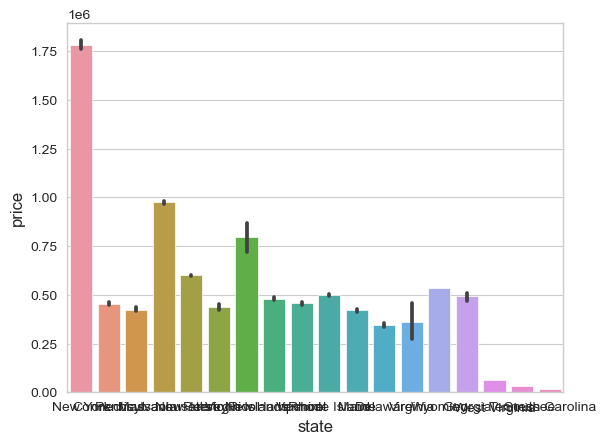

In [79]:
sns.barplot(x='state',y='price',data=df)

The correlations between the price, bedroom, bathroom, lot size and house size. 

In [80]:
df.corr()

,price,bed,bath,acre_lot,zip_code,house_size
price,1.000000,0.182529,0.313489,0.005213,0.061033,0.204020
bed,0.182529,1.000000,0.715877,-0.003839,-0.075941,0.376291
bath,0.313489,0.715877,1.000000,-0.000708,-0.046118,0.368672
acre_lot,0.005213,-0.003839,-0.000708,1.000000,0.003957,0.070968
zip_code,0.061033,-0.075941,-0.046118,0.003957,1.000000,-0.036473
house_size,0.204020,0.376291,0.368672,0.070968,-0.036473,1.000000


<AxesSubplot:>

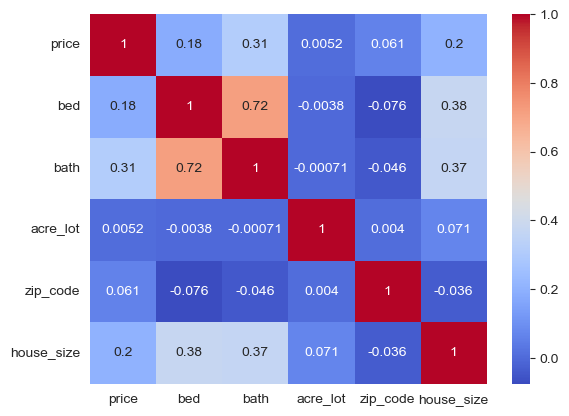

In [82]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

End of project. Thank you!